In [64]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

In [66]:
df = pd.read_csv("/content/world_aircraft_accident_summary.csv", encoding='latin1')

In [69]:
print("Original Shape:", df.shape)
print(df.head())

Original Shape: (607, 11)
  WAAS Subset Event Id Local Event Date               Aircraft  \
0             J1990003        25-JAN-90      BOEING 707-320B\n   
1             J1990004        14-FEB-90      AIRBUS A320-230\n   
2             J1990014        11-MAY-90       BOEING 737-300\n   
3             J1990023        02-OCT-90       BOEING 757-200\n   
4             J1990024        02-OCT-90  BOEING 737-200 ADV.\n   

         Aircraft Operator                          Event Location  \
0                  AVIANCA  COVE NECK,  LONG ISLAND,  NEW YORK, US   
1          INDIAN AIRLINES           HINDUSTAN AP.,  BANGALORE, IN   
2      PHILIPPINE AIRLINES     NINOY AQUINO INTL. AP.,  MANILA, PH   
3  CHINA SOUTHERN AIRLINES              BAIYUN AP.,  GUANGZHOU, CN   
4          XIAMEN AIRLINES              BAIYUN AP.,  GUANGZHOU, CN   

   Crew Fatalities  Crew Injured  Crew Aboard  PAX Fatalities  PAX Injuries  \
0                8             1            9              65            80  

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   WAAS Subset Event Id  607 non-null    object
 1   Local Event Date      607 non-null    object
 2   Aircraft              607 non-null    object
 3   Aircraft Operator     607 non-null    object
 4   Event Location        607 non-null    object
 5   Crew Fatalities       607 non-null    int64 
 6   Crew Injured          607 non-null    int64 
 7   Crew Aboard           607 non-null    int64 
 8   PAX Fatalities        607 non-null    int64 
 9   PAX Injuries          607 non-null    int64 
 10  PAX Aboard            607 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 52.3+ KB


In [68]:
df.describe()

,Crew Fatalities,Crew Injured,Crew Aboard,PAX Fatalities,PAX Injuries,PAX Aboard
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,3.495881,0.316310,4.698517,34.533773,3.584843,50.042834
std,3.404942,0.821803,3.750430,49.715611,9.457686,62.192330
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,4.000000,0.000000,9.000000
50%,2.000000,0.000000,4.000000,14.000000,0.000000,20.000000
75%,5.000000,0.000000,6.000000,41.000000,2.000000,65.500000
max,23.000000,6.000000,23.000000,289.000000,104.000000,374.000000


**Data Cleaning**

In [70]:
# Convert 'Local Event Date' to datetime
df['Local Event Date'] = pd.to_datetime(df['Local Event Date'], errors='coerce', dayfirst=True)


/tmp/ipython-input-2781605609.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Local Event Date'] = pd.to_datetime(df['Local Event Date'], errors='coerce', dayfirst=True)


In [71]:
# Extract Year for trend analysis
df['Year'] = df['Local Event Date'].dt.year

In [72]:
# Standardize text columns
text_cols = ['Aircraft', 'Aircraft Operator', 'Event Location']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.upper()

In [73]:
# Drop rows with missing critical info
df = df.dropna(subset=['Aircraft', 'Aircraft Operator', 'Local Event Date'])

# Drop duplicates
df = df.drop_duplicates()

In [74]:
print("✅ Cleaned Shape:", df.shape)
print(df.dtypes)
print(df.head())

✅ Cleaned Shape: (607, 12)
WAAS Subset Event Id            object
Local Event Date        datetime64[ns]
Aircraft                        object
Aircraft Operator               object
Event Location                  object
Crew Fatalities                  int64
Crew Injured                     int64
Crew Aboard                      int64
PAX Fatalities                   int64
PAX Injuries                     int64
PAX Aboard                       int64
Year                             int32
dtype: object
  WAAS Subset Event Id Local Event Date             Aircraft  \
0             J1990003       1990-01-25      BOEING 707-320B   
1             J1990004       1990-02-14      AIRBUS A320-230   
2             J1990014       1990-05-11       BOEING 737-300   
3             J1990023       1990-10-02       BOEING 757-200   
4             J1990024       1990-10-02  BOEING 737-200 ADV.   

         Aircraft Operator                          Event Location  \
0                  AVIANCA  COVE NEC

**Create Fatality and Injury Columns**

In [75]:
df['Total Fatalities'] = df['Crew Fatalities'] + df['PAX Fatalities']
df['Total Injuries'] = df['Crew Injured'] + df['PAX Injuries']
df['Total Aboard'] = df['Crew Aboard'] + df['PAX Aboard']

In [76]:
# Calculate Fatality Rate per accident
df['Fatality Rate'] = df['Total Fatalities'] / df['Total Aboard']

**Aircraft Safety Analysis**

In [77]:
accidents_by_aircraft = df.groupby('Aircraft').size()
fatal_by_aircraft = df.groupby('Aircraft')['Total Fatalities'].sum()

In [78]:
# Filter aircraft with >= 5 accidents to reduce noise
min_accidents = 5
valid_aircraft = accidents_by_aircraft[accidents_by_aircraft >= min_accidents].index
fatal_by_aircraft_filtered = fatal_by_aircraft[valid_aircraft]
accidents_filtered = accidents_by_aircraft[valid_aircraft]

In [79]:
fatality_rate = (fatal_by_aircraft_filtered / accidents_filtered).sort_values()

print("\nTop 10 Safest Aircraft (Lowest Fatality Rate, ≥5 accidents):")
print(fatality_rate.head(10))


Top 10 Safest Aircraft (Lowest Fatality Rate, ≥5 accidents):
Aircraft
BEECH 200 KING AIR                    4.700000
PBN BN-2A \nISLANDER                  5.600000
CESSNA 208B \nGRAND CARAVAN           5.739130
FAIRCHILD SA-227AC \nMETRO III        6.142857
DHC-3 TURBO OTTER                     6.400000
PBN BN-2B \nISLANDER                  7.000000
DHC-6 TWIN OTTER \n300               10.153846
DORNIER 228-200                      11.000000
ANTONOV (WSK-PZL MIELEC) AN-28\n8    11.750000
LET 410UVP TURBOLET                  11.950000
dtype: float64


In [80]:
print("\nTop 10 Riskiest Aircraft (Highest Fatality Rate, ≥5 accidents):")
print(fatality_rate.tail(10))


Top 10 Riskiest Aircraft (Highest Fatality Rate, ≥5 accidents):
Aircraft
BOEING 737-200 ADV.     69.000000
DOUGLAS MD-82           70.750000
AIRBUS A310-320         73.600000
DOUGLAS DC-9-32         81.166667
BOEING 757-200          82.000000
BOEING 737-300          88.875000
BOEING 727-200 ADV.     94.800000
BOEING 737-800          97.833333
TUPOLEV TU-154M        104.785714
AIRBUS A320-210        114.000000
dtype: float64


**Visualization**

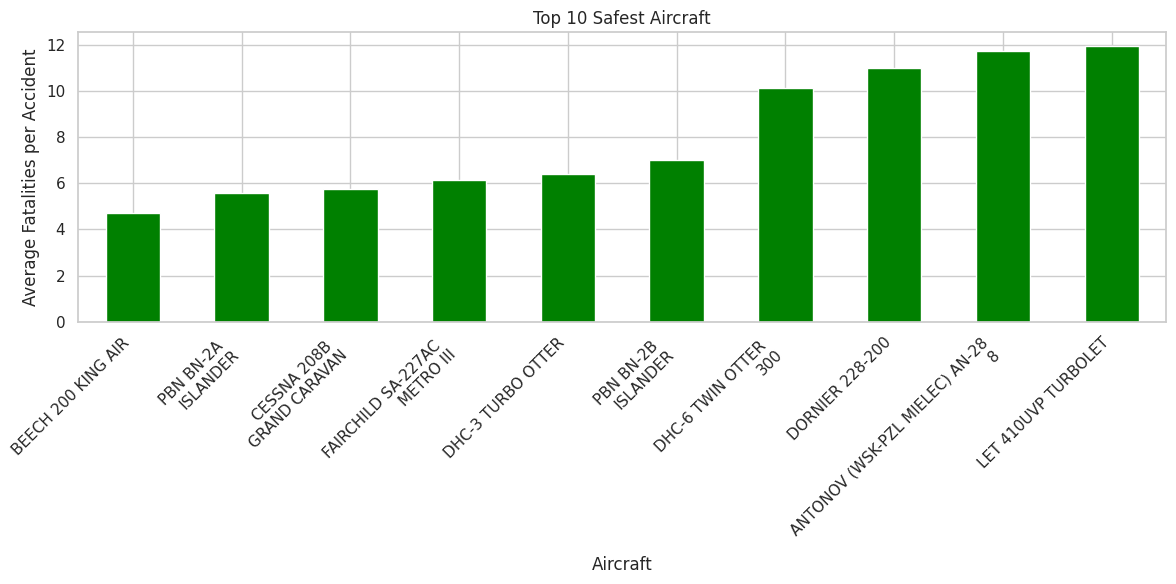

In [81]:
# bar plot
plt.figure(figsize=(12,6))
fatality_rate.head(10).plot(kind='bar', color='green')
plt.title("Top 10 Safest Aircraft")
plt.ylabel("Average Fatalities per Accident")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

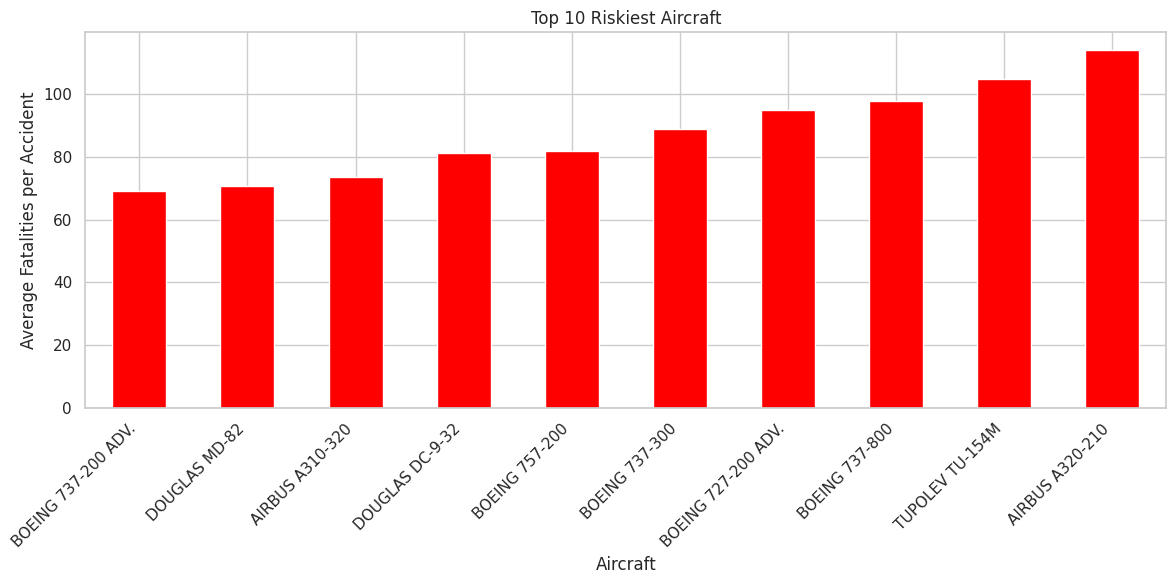

In [82]:
plt.figure(figsize=(12,6))
fatality_rate.tail(10).plot(kind='bar', color='red')
plt.title("Top 10 Riskiest Aircraft")
plt.ylabel("Average Fatalities per Accident")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Operator Analysis**

In [83]:
operator_stats = df.groupby('Aircraft Operator')[['Total Fatalities', 'Total Injuries']].sum().sort_values('Total Fatalities', ascending=False)
print("\nTop 10 Operators by Fatalities:\n", operator_stats.head(10))


Top 10 Operators by Fatalities:
                         Total Fatalities  Total Injuries
Aircraft Operator                                       
CHINA AIRLINES                       688              57
AMERICAN AIRLINES                    587              49
MALAYSIA AIRLINES                    571               0
AIR FRANCE                           341               3
SAUDI ARABIAN AIRLINES               312               0
EGYPTAIR                             297               0
KENYA AIRWAYS                        283               0
IRAN AIR TOURS                       277              30
NATIONAIR CANADA                     261               0
GARUDA INDONESIA                     258              30


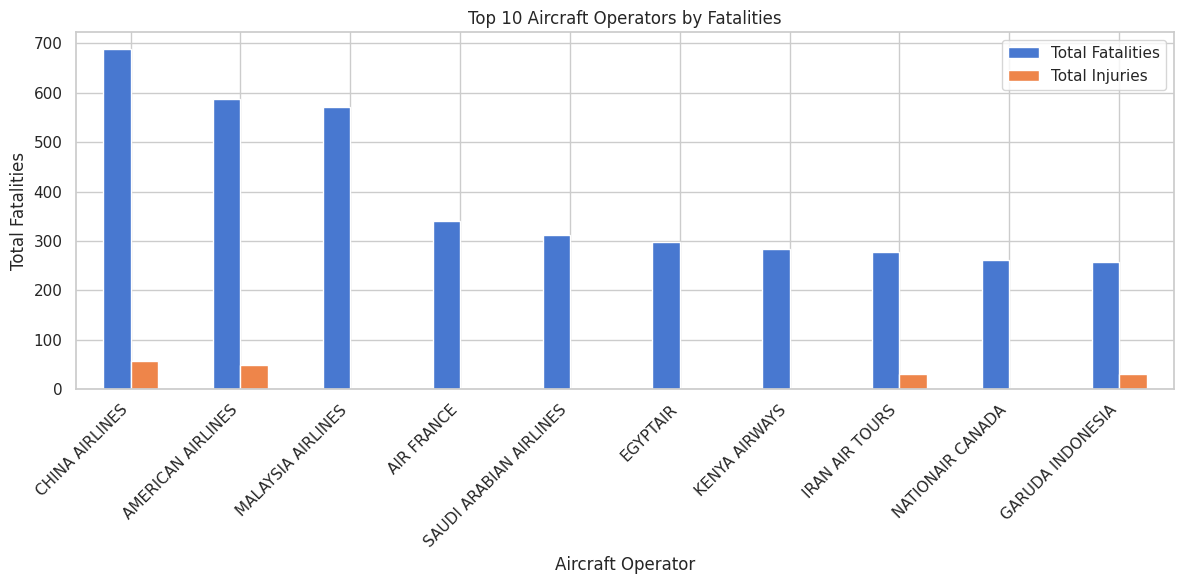

In [84]:
operator_stats.head(10).plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Aircraft Operators by Fatalities")
plt.ylabel("Total Fatalities")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Event Location Analysis**

In [85]:
location_stats = df.groupby('Event Location')[['Total Fatalities', 'Total Injuries']].sum().sort_values('Total Fatalities', ascending=False).head(15)
print("\nTop 15 Locations by Fatalities:\n", location_stats)


Top 15 Locations by Fatalities:
                                                     Total Fatalities  \
Event Location                                                         
NR. CHARKHI DADRI, 83KM W OF  DELHI, IN                          312   
NR. HRABOVE, 80KM ENE OF  DONETSK, UA                            298   
CHIANG KAI SHEK INTL. AP.,  TAIPEI, TW                           279   
KOMAKI AP.,  NAGOYA, JP                                          264   
KING ABDULAZIZ INTL. AP.,  JEDDAH, SA                            261   
BELLE HARBOR, QUEENS,  NEW YORK,  NEW YORK, US                   260   
MISSING,  SOUTHERN INDIAN OCEAN, 00                              239   
NR. MEDAN, ID                                                    234   
OFF MORICHES INLET, NR. MASTIC BEACH,  NEW YORK...               230   
IN SEA, 9KMOF FF PEGGY'S COVE,  NOVA SCOTIA, CA                  229   
NIMITZ HILL, NR. AGANA, GU                                       229   
ATLANTIC OCEAN, NE OF  NATAL, 

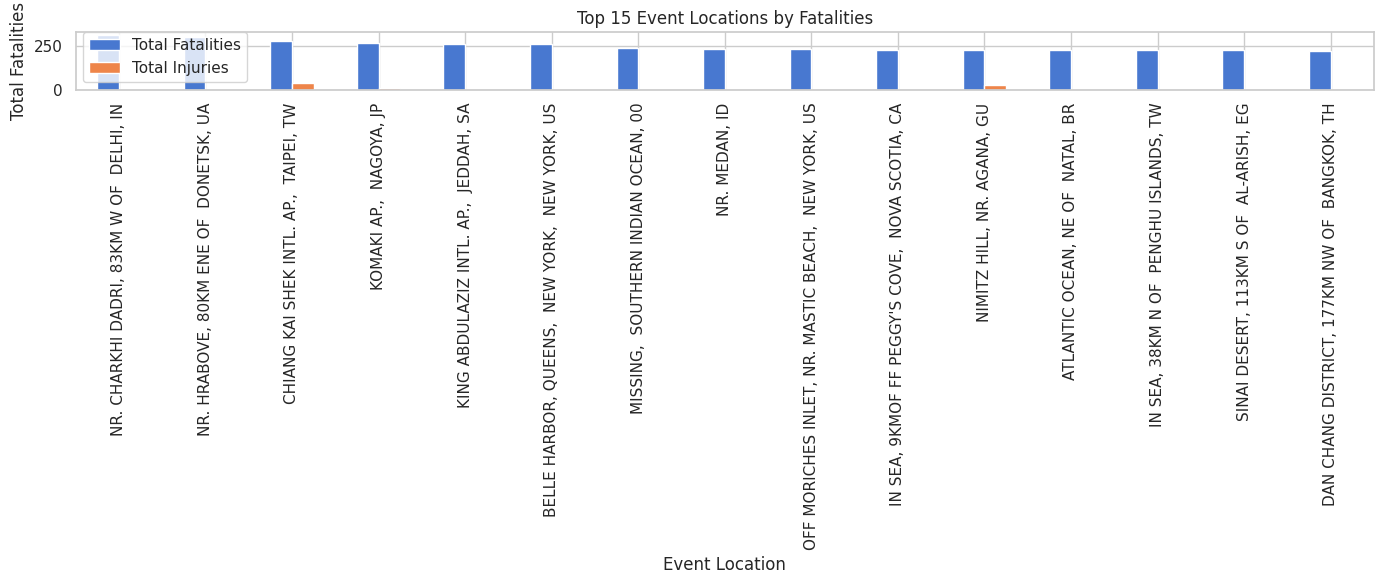

In [86]:
location_stats.plot(kind='bar', figsize=(14,6))
plt.title("Top 15 Event Locations by Fatalities")
plt.ylabel("Total Fatalities")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Yearly Trend Analysis**

In [87]:
yearly_stats = df.groupby('Year')[['Total Fatalities', 'Total Injuries']].sum()
print("\nYearly Fatalities and Injuries:\n", yearly_stats)


Yearly Fatalities and Injuries:
       Total Fatalities  Total Injuries
Year                                  
1990               699             273
1991              1015             109
1992              1331             186
1993              1196             168
1994              1340             120
1995              1104              99
1996              1770              78
1997              1249              97
1998              1132              19
1999               619             134
2000              1134              78
2001              1079              39
2002              1007              60
2003               632              54
2004               478              85
2005               977              69
2006               855             100
2007               684              99
2008               529             144
2009               687              37
2010               806              57
2011               491              90
2012               399        

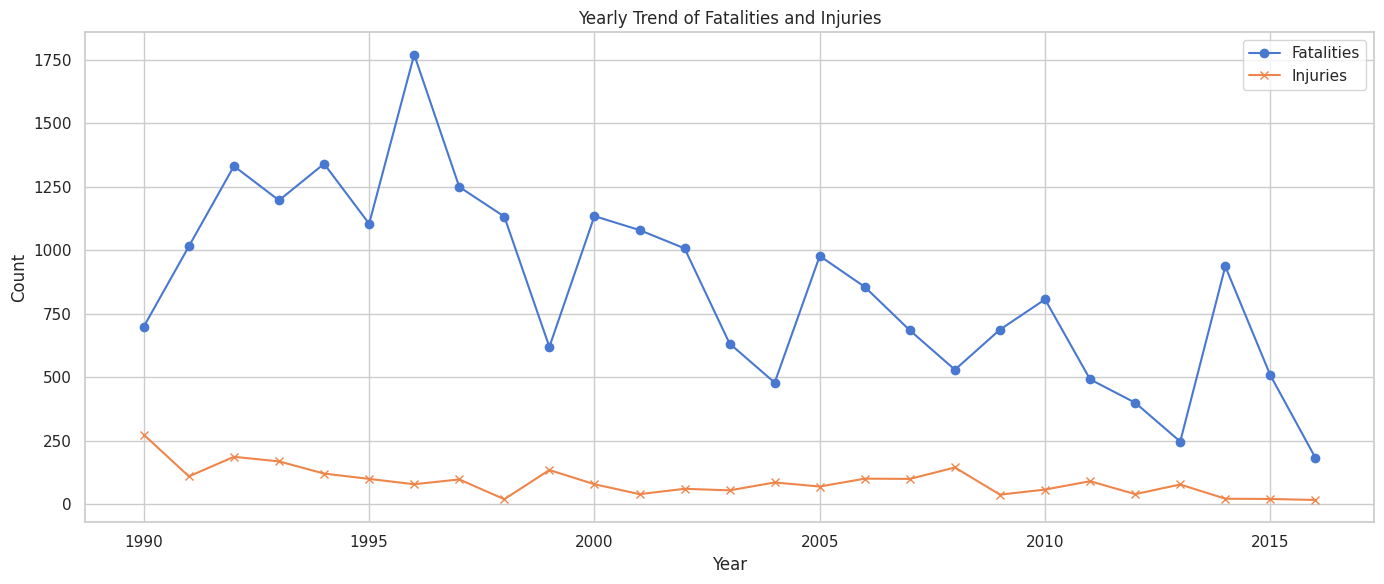

In [88]:
plt.figure(figsize=(14,6))
yearly_stats['Total Fatalities'].plot(label='Fatalities', marker='o')
yearly_stats['Total Injuries'].plot(label='Injuries', marker='x')
plt.title("Yearly Trend of Fatalities and Injuries")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

**Correlation Analysis**

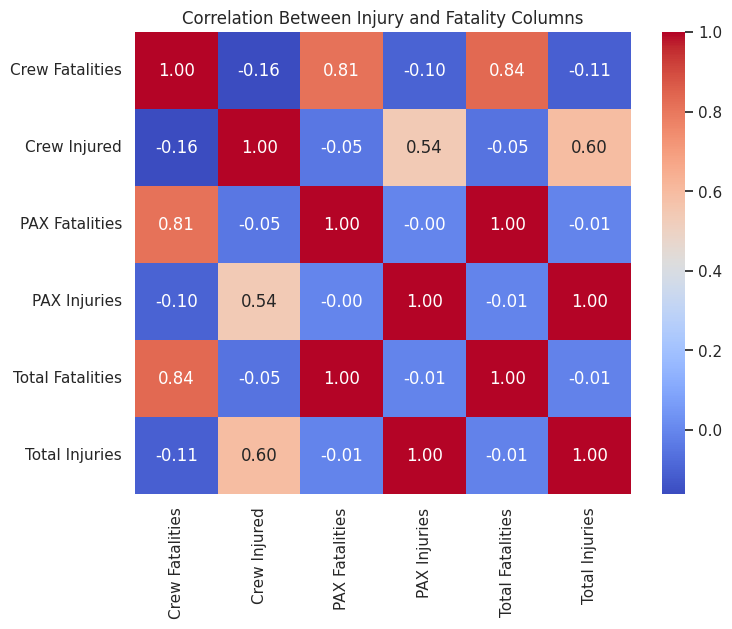

In [89]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Crew Fatalities', 'Crew Injured', 'PAX Fatalities', 'PAX Injuries', 'Total Fatalities', 'Total Injuries']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Injury and Fatality Columns")
plt.show()